# Traning a classification model 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Read the dataset (update the file path as needed)
df = pd.read_excel(r'E:\Dsde\python\project\marketing\dataset\HMS_Marketing_strategy_Classification.xlsx')



In [7]:
df.sample(5)

,Hospital_ID,Hospital_Type,Hospital_Rating,Patient_Age_Group,Ad_Budget,Seasonality_Factor,Hospital_Competitor_Count,Patient_Inquiries,Previous_Marketing_Strategy_Success,Community_Engagement_Score,Brand_Awareness,Local_Event_Count,Competitor_Marketing_Spend,Average_Stay_Length,Hospital_Staff_Satisfaction,Financial_Health,Patient_Income_Level,Market_Positioning,Marketing_Strategy,Marketing_Strategy_Label
2198,Hospital_2199,Specialized,4.355939,0-18,113058,0.80,4,1336,87,98,63,2,36693,1,91,Healthy,High,Newcomer,Paid Advertising,1
1755,Hospital_1756,Specialized,3.780793,36-60,144304,0.58,6,1805,85,72,26,3,29977,10,78,Moderate,Middle,Newcomer,Paid Advertising,1
3457,Hospital_3458,General,4.953251,60+,47178,0.68,3,1459,62,85,31,0,5620,14,100,Critical,Low,Mid-level,Referral Program,2
4870,Hospital_4871,Teaching Hospital,3.379410,60+,39080,0.55,10,1459,87,82,47,2,29891,8,81,Healthy,Middle,Leader,Community Outreach,0
1652,Hospital_1653,Teaching Hospital,2.390509,0-18,46960,0.58,0,1098,51,60,82,4,9436,1,84,Critical,Middle,Newcomer,Referral Program,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital_ID                          5000 non-null   object 
 1   Hospital_Type                        5000 non-null   object 
 2   Hospital_Rating                      5000 non-null   float64
 3   Patient_Age_Group                    5000 non-null   object 
 4   Ad_Budget                            5000 non-null   int64  
 5   Seasonality_Factor                   5000 non-null   float64
 6   Hospital_Competitor_Count            5000 non-null   int64  
 7   Patient_Inquiries                    5000 non-null   int64  
 8   Previous_Marketing_Strategy_Success  5000 non-null   int64  
 9   Community_Engagement_Score           5000 non-null   int64  
 10  Brand_Awareness                      5000 non-null   int64  
 11  Local_Event_Count             

In [9]:
df.describe()

,Hospital_Rating,Ad_Budget,Seasonality_Factor,Hospital_Competitor_Count,Patient_Inquiries,Previous_Marketing_Strategy_Success,Community_Engagement_Score,Brand_Awareness,Local_Event_Count,Competitor_Marketing_Spend,Average_Stay_Length,Hospital_Staff_Satisfaction,Marketing_Strategy_Label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.976405,105547.637400,0.502536,5.031400,1062.115800,74.643600,74.588000,49.96100,2.517200,52852.649200,7.971400,74.859600,1.475400
std,1.150193,55548.577691,0.287353,3.169609,550.744754,14.807594,14.712238,28.78574,1.707363,27350.737236,4.325266,14.565243,1.045377
min,1.000975,10021.000000,0.000000,0.000000,100.000000,50.000000,50.000000,0.00000,0.000000,5014.000000,1.000000,50.000000,0.000000
25%,2.006698,57756.500000,0.250000,2.000000,583.000000,62.000000,62.000000,25.00000,1.000000,29242.750000,4.000000,62.000000,1.000000
50%,2.960940,105460.500000,0.510000,5.000000,1072.000000,75.000000,74.000000,50.00000,3.000000,53204.000000,8.000000,75.000000,1.000000
75%,3.971842,154746.000000,0.750000,8.000000,1549.000000,87.000000,87.000000,75.00000,4.000000,76429.500000,12.000000,87.000000,2.000000
max,4.997286,199959.000000,1.000000,10.000000,2000.000000,100.000000,100.000000,100.00000,5.000000,99980.000000,15.000000,100.000000,4.000000



### Summary of Key Statistics

The dataset contains 5000 entries with various attributes related to hospital marketing strategies and performance metrics. Below are some key insights:

- **Hospital Rating**: The average hospital rating is approximately 2.98, with a standard deviation of 1.15. Ratings range from 1.00 to 4.99.
- **Ad Budget**: The average advertising budget is around 105,547, with a wide range from 10,021 to 199,959.
- **Seasonality Factor**: The seasonality factor has an average of 0.50, indicating moderate seasonal effects, with values ranging from 0 to 1.
- **Hospital Competitor Count**: On average, hospitals have about 5 competitors, with a range from 0 to 10.
- **Patient Inquiries**: The average number of patient inquiries is 1062, with a standard deviation of 550. The number of inquiries ranges from 100 to 2000.
- **Previous Marketing Strategy Success**: The average success score of previous marketing strategies is 74.64, with a range from 50 to 100.
- **Community Engagement Score**: The average community engagement score is 74.59, with a range from 50 to 100.
- **Brand Awareness**: The average brand awareness score is 49.96, with a range from 0 to 100.
- **Local Event Count**: On average, hospitals participate in about 2.52 local events, with a range from 0 to 5.
- **Competitor Marketing Spend**: The average competitor marketing spend is 52,853, with a range from 5,014 to 99,980.
- **Average Stay Length**: The average length of stay is approximately 7.97 days, with a range from 1 to 15 days.
- **Hospital Staff Satisfaction**: The average staff satisfaction score is 74.86, with a range from 50 to 100.



# Correlation Matrix

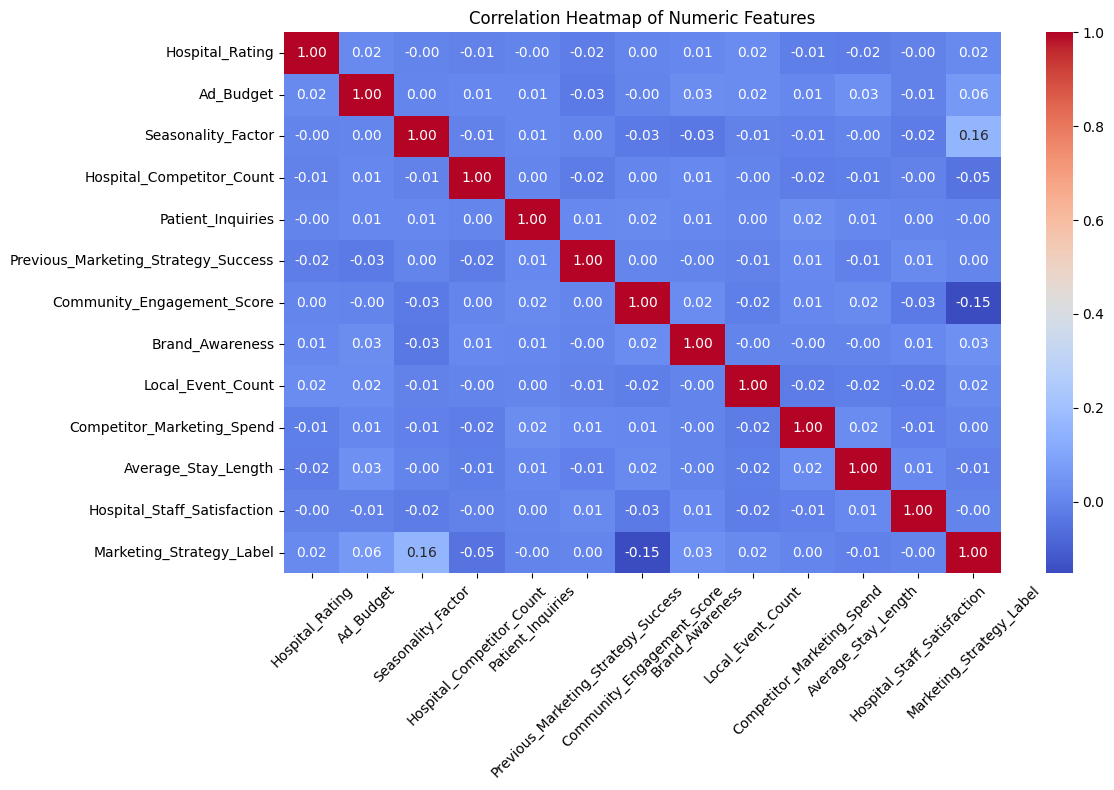

In [16]:
# visualization of the data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# correlation matrix heatmap - select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




In [17]:
# missing values
df.isnull().sum()

Hospital_ID                            0
Hospital_Type                          0
Hospital_Rating                        0
Patient_Age_Group                      0
Ad_Budget                              0
Seasonality_Factor                     0
Hospital_Competitor_Count              0
Patient_Inquiries                      0
Previous_Marketing_Strategy_Success    0
Community_Engagement_Score             0
Brand_Awareness                        0
Local_Event_Count                      0
Competitor_Marketing_Spend             0
Average_Stay_Length                    0
Hospital_Staff_Satisfaction            0
Financial_Health                       0
Patient_Income_Level                   0
Market_Positioning                     0
Marketing_Strategy                     0
Marketing_Strategy_Label               0
dtype: int64

As we can see there is not null values

In [18]:
# check duplicates
df.duplicated().sum()

np.int64(0)

As there is not dupicated values


Outliers detected using IQR method:
Marketing_Strategy_Label               277
Ad_Budget                                0
Seasonality_Factor                       0
Hospital_Competitor_Count                0
Hospital_Rating                          0
Patient_Inquiries                        0
Previous_Marketing_Strategy_Success      0
Brand_Awareness                          0
Community_Engagement_Score               0
Local_Event_Count                        0
Competitor_Marketing_Spend               0
Average_Stay_Length                      0
Hospital_Staff_Satisfaction              0
dtype: int64


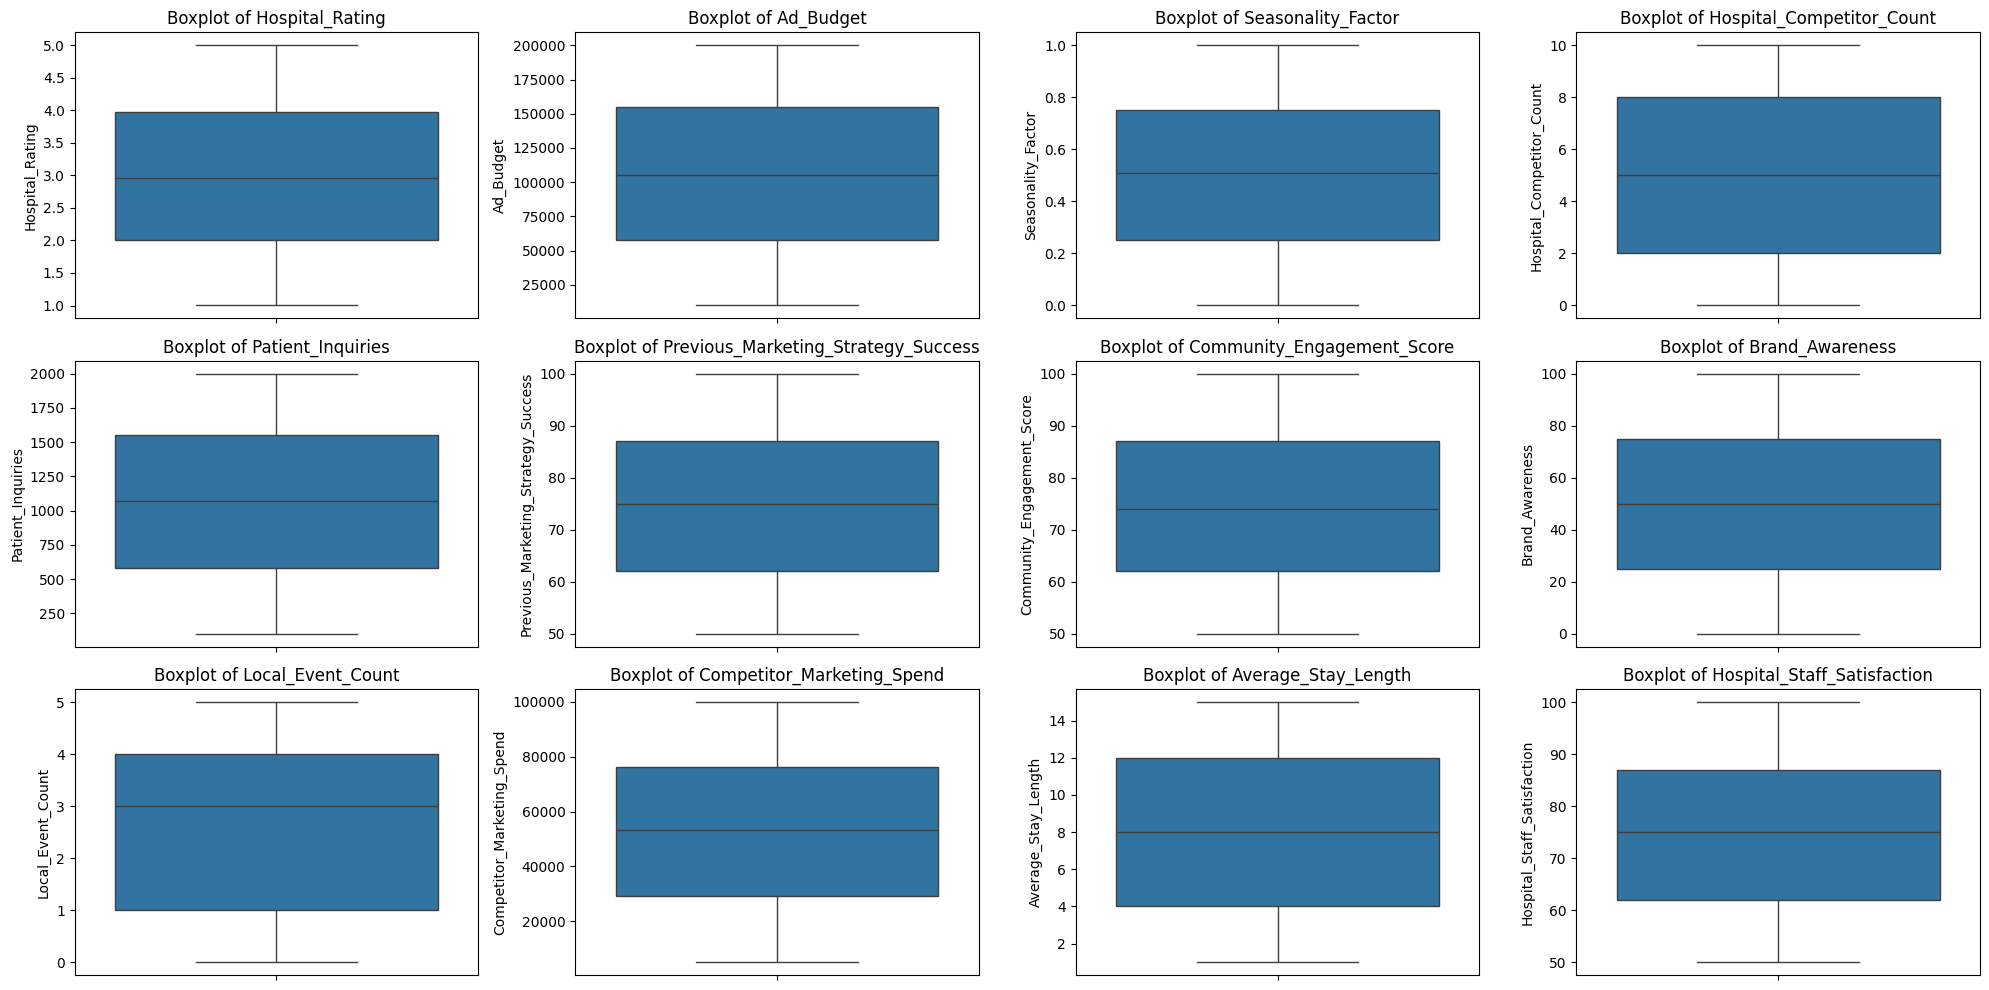

In [20]:
# outlier detection report

def detect_outliers_iqr(df, threshold=1.5):
    """
    Detect outliers using the IQR method.
    Data points below Q1 - threshold*IQR or above Q3 + threshold*IQR are considered outliers.
    """
    outliers_dict = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outliers_dict[col] = outliers
    
    return pd.Series(outliers_dict).sort_values(ascending=False)

# Detect outliers using IQR method
print("\nOutliers detected using IQR method:")
iqr_outliers = detect_outliers_iqr(df)
print(iqr_outliers)

# Visualize outliers using boxplots
plt.figure(figsize=(20, 10))
numeric_df = df.select_dtypes(include=[np.number])
# Exclude target variable from visualization
feature_cols = [col for col in numeric_df.columns if col != 'Marketing_Strategy_Label']

# Create multiple boxplots for each numeric column
for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()



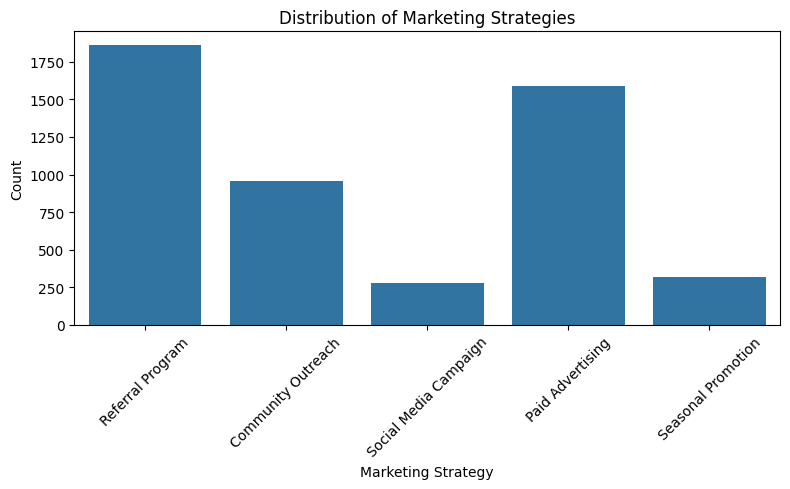

In [10]:
# visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Marketing_Strategy', data=df)
plt.title('Distribution of Marketing Strategies')
plt.xlabel('Marketing Strategy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital_ID                          5000 non-null   object 
 1   Hospital_Type                        5000 non-null   object 
 2   Hospital_Rating                      5000 non-null   float64
 3   Patient_Age_Group                    5000 non-null   object 
 4   Ad_Budget                            5000 non-null   int64  
 5   Seasonality_Factor                   5000 non-null   float64
 6   Hospital_Competitor_Count            5000 non-null   int64  
 7   Patient_Inquiries                    5000 non-null   int64  
 8   Previous_Marketing_Strategy_Success  5000 non-null   int64  
 9   Community_Engagement_Score           5000 non-null   int64  
 10  Brand_Awareness                      5000 non-null   int64  
 11  Local_Event_Count             

In [36]:
df.head(10)

,Hospital_Type,Hospital_Rating,Patient_Age_Group,Ad_Budget,Seasonality_Factor,Hospital_Competitor_Count,Patient_Inquiries,Previous_Marketing_Strategy_Success,Community_Engagement_Score,Brand_Awareness,Local_Event_Count,Competitor_Marketing_Spend,Average_Stay_Length,Hospital_Staff_Satisfaction,Financial_Health,Patient_Income_Level,Market_Positioning,Marketing_Strategy,Marketing_Strategy_Label
0,Teaching Hospital,4.081482,36-60,31610,0.62,5,633,54,82,35,3,53132,4,53,Critical,Low,Mid-level,Referral Program,2
1,General,4.208427,0-18,128758,0.06,2,966,79,84,52,4,5134,15,84,Healthy,Low,Leader,Community Outreach,0
2,General,1.784996,19-35,90928,0.28,5,272,77,98,45,2,9322,3,65,Healthy,Middle,Leader,Community Outreach,0
3,Teaching Hospital,4.383459,19-35,11939,0.70,2,144,85,89,49,5,64897,9,72,Healthy,High,Mid-level,Community Outreach,0
4,Teaching Hospital,3.217979,0-18,124486,0.65,1,323,57,74,43,0,25178,2,64,Healthy,Middle,Mid-level,Community Outreach,0
5,General,2.086771,19-35,72954,0.65,3,926,59,71,49,0,88516,4,98,Healthy,Low,Leader,Social Media Campaign,4
6,Teaching Hospital,3.389362,0-18,160134,0.22,10,1111,58,55,94,2,28398,7,73,Moderate,High,Newcomer,Paid Advertising,1
7,General,4.973225,0-18,62239,0.28,4,374,88,71,1,3,41865,7,79,Critical,Low,Newcomer,Referral Program,2
8,Teaching Hospital,4.780841,36-60,142650,0.42,7,376,83,69,100,1,19582,13,67,Moderate,High,Mid-level,Referral Program,2
9,Teaching Hospital,3.317248,36-60,79292,0.17,2,1308,94,94,59,2,71259,10,69,Healthy,Low,Mid-level,Community Outreach,0


In [26]:
# drop Hospital_ID column
df = df.drop(columns=['Hospital_ID'])


## select dtype object and count value count for each columns

In [ ]:
 
for col in df.select_dtypes(include=['object']):
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

    

Column: Hospital_Type
Hospital_Type
General              1724
Specialized          1671
Teaching Hospital    1605
Name: count, dtype: int64


Column: Patient_Age_Group
Patient_Age_Group
0-18     1280
36-60    1279
60+      1222
19-35    1219
Name: count, dtype: int64


Column: Financial_Health
Financial_Health
Critical    1714
Healthy     1661
Moderate    1625
Name: count, dtype: int64


Column: Patient_Income_Level
Patient_Income_Level
Low       1690
Middle    1670
High      1640
Name: count, dtype: int64


Column: Market_Positioning
Market_Positioning
Leader       1696
Mid-level    1681
Newcomer     1623
Name: count, dtype: int64


Column: Marketing_Strategy
Marketing_Strategy
Referral Program         1860
Paid Advertising         1586
Community Outreach        956
Seasonal Promotion        321
Social Media Campaign     277
Name: count, dtype: int64




## Identifying each categories and encoding according to it

In [40]:
# Identify all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_columns}")

# Create a new dataframe to store the processed data
df_encoded = df.copy()

# Handle Financial_Health with ordinal encoding
financial_health_mapping = {'Critical': 0, 'Moderate': 1, 'Healthy': 2}
df_encoded['Financial_Health_Ordinal'] = df_encoded['Financial_Health'].map(financial_health_mapping)

# Apply one-hot encoding to all categorical columns except Financial_Health and Marketing_Strategy
categorical_to_encode = [col for col in categorical_columns if col not in ['Financial_Health', 'Marketing_Strategy']]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_to_encode, drop_first=False)

# If Marketing_Strategy should be used as the target, don't encode it now
# Drop original categorical columns that have been encoded
df_encoded = df_encoded.drop(columns=['Financial_Health'])

# Display the first few rows of the encoded dataframe
print("\nDataFrame shape after encoding:", df_encoded.shape)
print("\nColumns after encoding:")
print(df_encoded.columns.tolist())
df_encoded.head()

Categorical columns to encode: ['Hospital_Type', 'Patient_Age_Group', 'Financial_Health', 'Patient_Income_Level', 'Market_Positioning', 'Marketing_Strategy']

DataFrame shape after encoding: (5000, 28)

Columns after encoding:
['Hospital_Rating', 'Ad_Budget', 'Seasonality_Factor', 'Hospital_Competitor_Count', 'Patient_Inquiries', 'Previous_Marketing_Strategy_Success', 'Community_Engagement_Score', 'Brand_Awareness', 'Local_Event_Count', 'Competitor_Marketing_Spend', 'Average_Stay_Length', 'Hospital_Staff_Satisfaction', 'Marketing_Strategy', 'Marketing_Strategy_Label', 'Financial_Health_Ordinal', 'Hospital_Type_General', 'Hospital_Type_Specialized', 'Hospital_Type_Teaching Hospital', 'Patient_Age_Group_0-18', 'Patient_Age_Group_19-35', 'Patient_Age_Group_36-60', 'Patient_Age_Group_60+', 'Patient_Income_Level_High', 'Patient_Income_Level_Low', 'Patient_Income_Level_Middle', 'Market_Positioning_Leader', 'Market_Positioning_Mid-level', 'Market_Positioning_Newcomer']


,Hospital_Rating,Ad_Budget,Seasonality_Factor,Hospital_Competitor_Count,Patient_Inquiries,Previous_Marketing_Strategy_Success,Community_Engagement_Score,Brand_Awareness,Local_Event_Count,Competitor_Marketing_Spend,...,Patient_Age_Group_0-18,Patient_Age_Group_19-35,Patient_Age_Group_36-60,Patient_Age_Group_60+,Patient_Income_Level_High,Patient_Income_Level_Low,Patient_Income_Level_Middle,Market_Positioning_Leader,Market_Positioning_Mid-level,Market_Positioning_Newcomer
0,4.081482,31610,0.62,5,633,54,82,35,3,53132,...,False,False,True,False,False,True,False,False,True,False
1,4.208427,128758,0.06,2,966,79,84,52,4,5134,...,True,False,False,False,False,True,False,True,False,False
2,1.784996,90928,0.28,5,272,77,98,45,2,9322,...,False,True,False,False,False,False,True,True,False,False
3,4.383459,11939,0.70,2,144,85,89,49,5,64897,...,False,True,False,False,True,False,False,False,True,False
4,3.217979,124486,0.65,1,323,57,74,43,0,25178,...,True,False,False,False,False,False,True,False,True,False


In [42]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital_Rating                      5000 non-null   float64
 1   Ad_Budget                            5000 non-null   int64  
 2   Seasonality_Factor                   5000 non-null   float64
 3   Hospital_Competitor_Count            5000 non-null   int64  
 4   Patient_Inquiries                    5000 non-null   int64  
 5   Previous_Marketing_Strategy_Success  5000 non-null   int64  
 6   Community_Engagement_Score           5000 non-null   int64  
 7   Brand_Awareness                      5000 non-null   int64  
 8   Local_Event_Count                    5000 non-null   int64  
 9   Competitor_Marketing_Spend           5000 non-null   int64  
 10  Average_Stay_Length                  5000 non-null   int64  
 11  Hospital_Staff_Satisfaction   

In [ ]:
# encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df[Hospital_Type])
# convert Financial_Health to ordinal encoding
# create a mapping dictionary
financial_health_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
# apply mapping to create ordinal column
df['Financial_Health_Ordinal'] = df['Financial_Health'].map(financial_health_mapping)
# drop the original Financial_Health column
df = df.drop(columns=['Financial_Health'])

# library of ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
# create an ordinal encoder object
ordinal_encoder = OrdinalEncoder()

['Financial_Health',]


# display the first few rows of the encoded dataframe
df_encoded.head()

# convert Hospital_Type from object to numerical



,Hospital_Rating,Ad_Budget,Seasonality_Factor,Hospital_Competitor_Count,Patient_Inquiries,Previous_Marketing_Strategy_Success,Community_Engagement_Score,Brand_Awareness,Local_Event_Count,Competitor_Marketing_Spend,...,Patient_Income_Level_Low,Patient_Income_Level_Middle,Market_Positioning_Leader,Market_Positioning_Mid-level,Market_Positioning_Newcomer,Marketing_Strategy_Community Outreach,Marketing_Strategy_Paid Advertising,Marketing_Strategy_Referral Program,Marketing_Strategy_Seasonal Promotion,Marketing_Strategy_Social Media Campaign
0,4.081482,31610,0.62,5,633,54,82,35,3,53132,...,True,False,False,True,False,False,False,True,False,False
1,4.208427,128758,0.06,2,966,79,84,52,4,5134,...,True,False,True,False,False,True,False,False,False,False
2,1.784996,90928,0.28,5,272,77,98,45,2,9322,...,False,True,True,False,False,True,False,False,False,False
3,4.383459,11939,0.70,2,144,85,89,49,5,64897,...,False,False,False,True,False,True,False,False,False,False
4,3.217979,124486,0.65,1,323,57,74,43,0,25178,...,False,True,False,True,False,True,False,False,False,False


In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital_Rating                      5000 non-null   float64
 1   Ad_Budget                            5000 non-null   int64  
 2   Seasonality_Factor                   5000 non-null   float64
 3   Hospital_Competitor_Count            5000 non-null   int64  
 4   Patient_Inquiries                    5000 non-null   int64  
 5   Previous_Marketing_Strategy_Success  5000 non-null   int64  
 6   Community_Engagement_Score           5000 non-null   int64  
 7   Brand_Awareness                      5000 non-null   int64  
 8   Local_Event_Count                    5000 non-null   int64  
 9   Competitor_Marketing_Spend           5000 non-null   int64  
 10  Average_Stay_Length                  5000 non-null   int64  
 11  Hospital_Staff_Satisfaction   

## Defining Featuer and Target variable 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define features and target
X = df_encoded.drop(columns=['Marketing_Strategy', 'Marketing_Strategy_Label'])
y = df_encoded['Marketing_Strategy_Label']



## Split the data into training and test sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



Training set shape: (4000, 26)
Testing set shape: (1000, 26)


## Traning a Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



## Calculate Model accuracy

In [ ]:

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")



Test Accuracy: 0.9870


## Classification report


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       186
           1       0.99      1.00      1.00       307
           2       1.00      0.97      0.98       389
           3       0.95      1.00      0.97        71
           4       0.96      1.00      0.98        47

    accuracy                           0.99      1000
   macro avg       0.97      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000


Confusion Matrix:
[[185   0   0   0   1]
 [  0 307   0   0   0]
 [  5   2 377   4   1]
 [  0   0   0  71   0]
 [  0   0   0   0  47]]


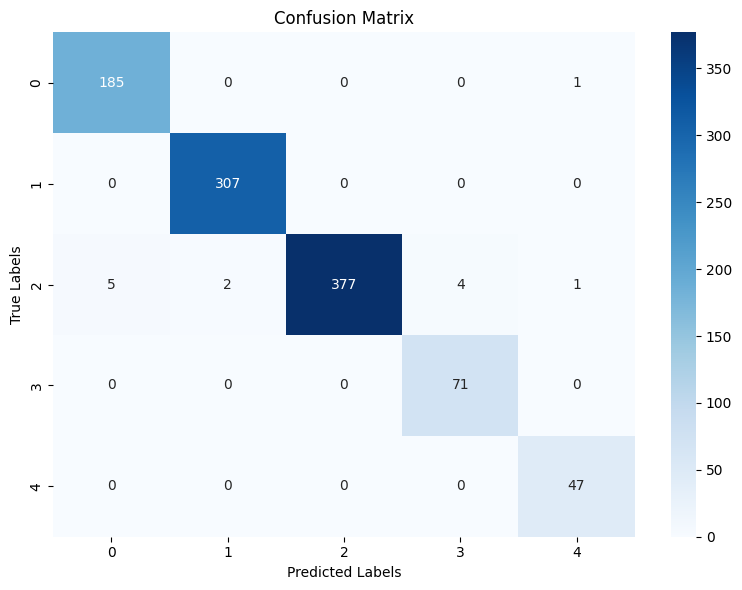

In [ ]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()



## Feature importance

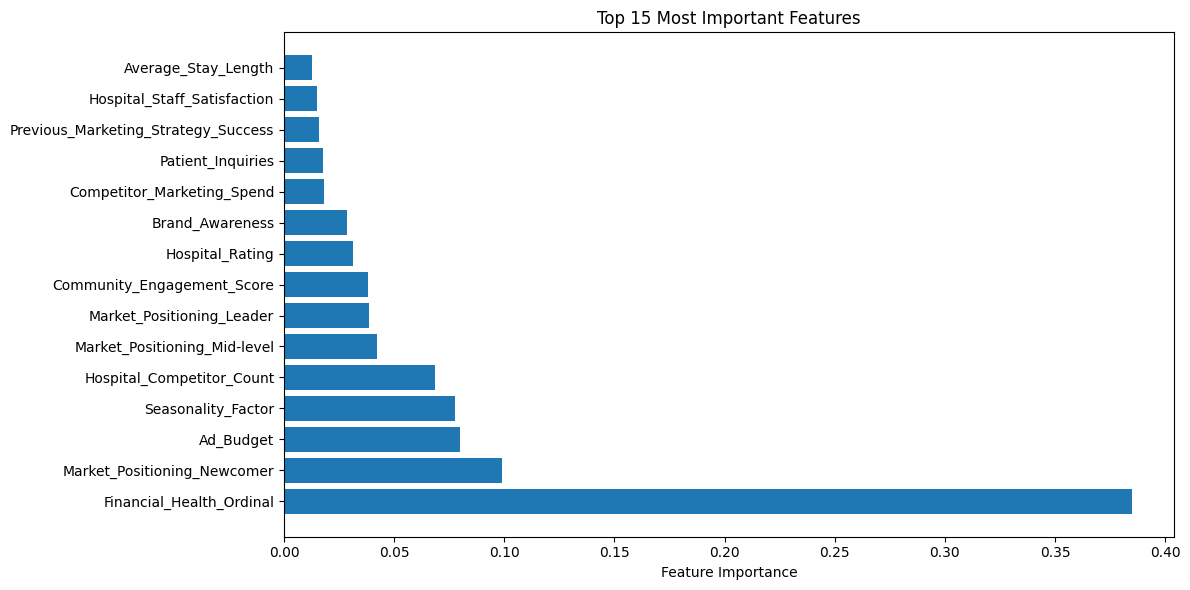

In [ ]:

feature_importance = model.feature_importances_
feature_names = X.columns

# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_features[:15])), sorted_importance[:15], align='center')
plt.yticks(range(len(sorted_features[:15])), sorted_features[:15])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

## Traning Logistic Regression Model 

In [53]:
# traning regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df_encoded.drop(columns=['Marketing_Strategy', 'Marketing_Strategy_Label'])
y = df_encoded['Marketing_Strategy_Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)





In [60]:
# Evaluate the model

# Convert regression predictions to classification labels
y_pred_class = np.round(y_pred)

# accuracy score
test_accuracy = accuracy_score(y_test, y_pred_class)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")




Test Accuracy: 0.9820
Mean Squared Error: 0.0304
R-squared: 0.9709



Confusion Matrix:
[[183   2   0   1   0]
 [  0 307   0   0   0]
 [  0   8 378   2   1]
 [  0   0   2  69   0]
 [  0   0   0   2  45]]


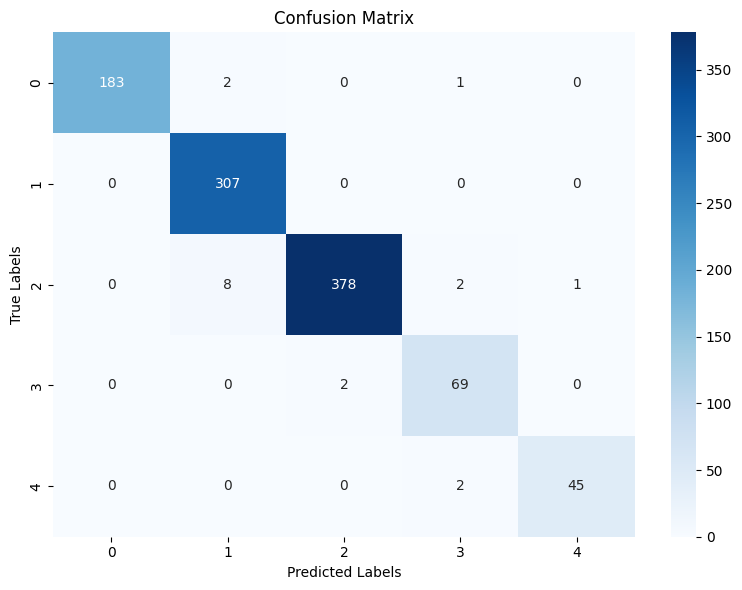


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       186
           1       0.97      1.00      0.98       307
           2       0.99      0.97      0.98       389
           3       0.93      0.97      0.95        71
           4       0.98      0.96      0.97        47

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



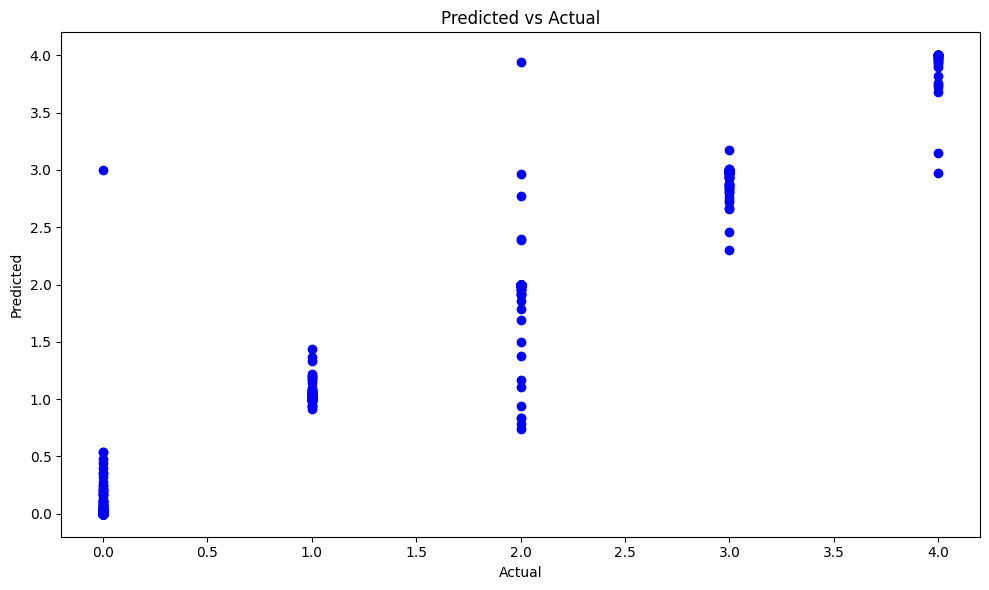

In [58]:
# confusion matrix for regression model
# Convert regression predictions to classification labels
y_pred_class = np.round(y_pred)

# Convert regression test labels to classification labels

y_test_class = np.round(y_test)

# Create a confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# classification report for regression model
# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))

# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()
